<a href="https://colab.research.google.com/github/Kim-Yeon-Jun/Dacon/blob/main/Daegu_corr_lgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/train.csv")
X = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/corr_train.csv")
y = train.ECLO.copy()
test = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/corr_test.csv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="linear", input_dim=14, name="layer1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="linear", name="layer2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation="linear", name="layer3"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, name="layer5"),
])

In [ ]:
lr = 0.03
optimizer = SGD(learning_rate = lr)
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
estop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 콜백 클래스 정의
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

history_callback = LossHistory()

In [ ]:
#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=[history_callback, estop])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),callbacks=[history_callback])

Epoch 1/10
991/991 [==============================] - 5s 4ms/step - loss: 10.5010 - val_loss: 10.1207
Epoch 2/10
991/991 [==============================] - 5s 5ms/step - loss: 10.1872 - val_loss: 10.0929
Epoch 3/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1646 - val_loss: 10.0893
Epoch 4/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1420 - val_loss: 9.9016
Epoch 5/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1569 - val_loss: 10.0894
Epoch 6/10
991/991 [==============================] - 4s 4ms/step - loss: 10.1371 - val_loss: 9.8870
Epoch 7/10
991/991 [==============================] - 5s 5ms/step - loss: 10.1037 - val_loss: 9.9746
Epoch 8/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1094 - val_loss: 9.8436
Epoch 9/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1031 - val_loss: 9.9278
Epoch 10/10
991/991 [==============================] - 3s 3ms/step - loss: 10.0917 - va

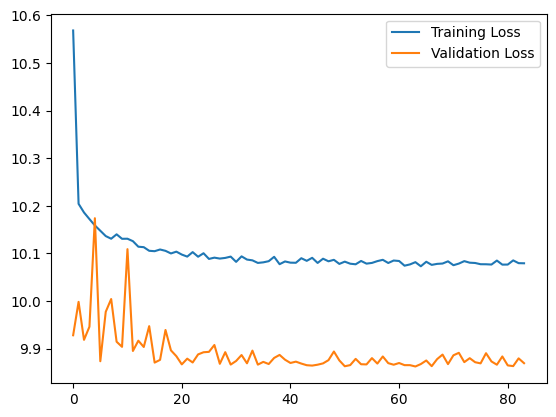

In [ ]:
plt.plot(history_callback.losses, label='Training Loss')
plt.plot(history_callback.val_losses, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test)
print(predictions)

343/343 [==============================] - 1s 3ms/step
[[4.4779053]
 [4.235179 ]
 [5.594164 ]
 ...
 [5.1198425]
 [5.3625693]
 [5.5947876]]


In [ ]:
result = np.round(predictions)
sub = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/sample_submission.csv")
sub['ECLO'] = result
sub.head()

,ID,ECLO
0,ACCIDENT_39609,4.0
1,ACCIDENT_39610,4.0
2,ACCIDENT_39611,6.0
3,ACCIDENT_39612,5.0
4,ACCIDENT_39613,5.0


In [ ]:
sub.ECLO.value_counts()

5.0    8243
4.0    2324
6.0     337
3.0      59
Name: ECLO, dtype: int64

In [ ]:
sub.to_csv('/content/drive/MyDrive/Dacon/Daegu_accident/submission_corr_1.csv', index=False)

## 상관관계를 통한 표준화 데이터 기반

In [145]:
train = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/train.csv")
X = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/strain.csv")
y = train.ECLO.copy()
test = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/stest.csv")

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [147]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_dim=7, name="layer1"),
    tf.keras.layers.Dense(16, activation='relu', name="layer2"),
    tf.keras.layers.Dense(1, activation='relu', name="layer3")
])

In [148]:
lr = 0.001
optimizer = SGD(learning_rate = lr)
model.compile(optimizer='sgd', loss='mean_squared_error')

In [149]:
estop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 콜백 클래스 정의
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

history_callback = LossHistory()

In [150]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=[history_callback, estop])

Epoch 1/100
991/991 [==============================] - 3s 2ms/step - loss: 10.3519 - val_loss: 10.0251
Epoch 2/100
991/991 [==============================] - 3s 3ms/step - loss: 10.1560 - val_loss: 10.2129
Epoch 3/100
991/991 [==============================] - 3s 3ms/step - loss: 10.1429 - val_loss: 10.2057
Epoch 4/100
991/991 [==============================] - 3s 3ms/step - loss: 10.1413 - val_loss: 10.0003
Epoch 5/100
991/991 [==============================] - 2s 2ms/step - loss: 10.1385 - val_loss: 10.1920
Epoch 6/100
991/991 [==============================] - 2s 2ms/step - loss: 10.1189 - val_loss: 9.9989
Epoch 7/100
991/991 [==============================] - 2s 2ms/step - loss: 10.1174 - val_loss: 10.1056
Epoch 8/100
991/991 [==============================] - 2s 2ms/step - loss: 10.1166 - val_loss: 9.9827
Epoch 9/100
991/991 [==============================] - 3s 3ms/step - loss: 10.1111 - val_loss: 10.0658
Epoch 10/100
991/991 [==============================] - 3s 3ms/step - loss:

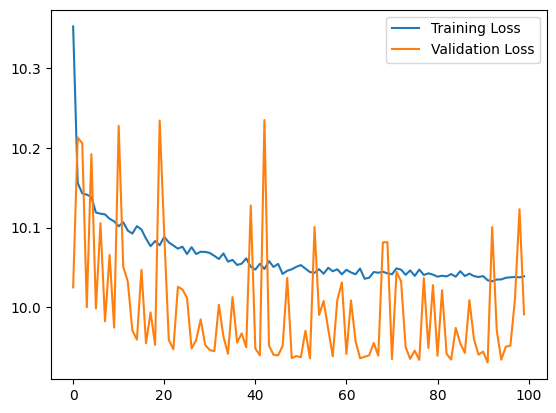

In [152]:
plt.plot(history_callback.losses, label='Training Loss')
plt.plot(history_callback.val_losses, label='Validation Loss')
plt.legend()
plt.show()

In [153]:
predictions = model.predict(test)
print(predictions)

343/343 [==============================] - 1s 1ms/step
[[3.890495 ]
 [3.7742398]
 [5.1332197]
 ...
 [4.796551 ]
 [4.95107  ]
 [5.198889 ]]


In [154]:
result = np.round(predictions)
sub = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/sample_submission.csv")
sub['ECLO'] = result
sub.head()

,ID,ECLO
0,ACCIDENT_39609,4.0
1,ACCIDENT_39610,4.0
2,ACCIDENT_39611,5.0
3,ACCIDENT_39612,5.0
4,ACCIDENT_39613,5.0


In [155]:
sub.ECLO.value_counts()

5.0    5958
4.0    4953
6.0      52
Name: ECLO, dtype: int64

In [156]:
sub.to_csv('/content/drive/MyDrive/Dacon/Daegu_accident/submission_standard_1.csv', index=False)

## Lightbgm 맛보기

In [157]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [167]:
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [169]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

model = lgb.train(params, train_data, valid_sets=[train_data, test_data], num_boost_round=100)

# 모델 예측
y_pred = model.predict(test, num_iteration=model.best_iteration)

# # 평가
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 31687, number of used features: 7
[LightGBM] [Info] Start training from score 4.730899


In [170]:
print(len(y_pred))

10963


In [171]:
lgbm_result = np.round(y_pred)
lgbm_sub = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/sample_submission.csv")
lgbm_sub['ECLO'] = lgbm_result
lgbm_sub.head()

,ID,ECLO
0,ACCIDENT_39609,4.0
1,ACCIDENT_39610,4.0
2,ACCIDENT_39611,5.0
3,ACCIDENT_39612,5.0
4,ACCIDENT_39613,5.0


In [172]:
lgbm_sub.ECLO.value_counts()

5.0    7119
4.0    2672
6.0    1006
3.0     116
7.0      49
8.0       1
Name: ECLO, dtype: int64

In [173]:
lgbm_sub.to_csv('/content/drive/MyDrive/Dacon/Daegu_accident/submission_lgbm_1.csv', index=False)